In [1]:
# Import dependencies
import pandas as pd
from pathlib import Path
import chardet
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
# reading in data, and info
df = pd.read_csv('database.csv')
print(df.head())
print(df.info())
print(df.describe())

   Age  Workclass  Fnlwgt     Education  Educational-Grade  \
0   25    Private  226802          11th                  7   
1   38    Private   89814       HS-grad                  9   
2   28  Local-gov  336951    Assoc-acdm                 12   
3   44    Private  160323  Some-college                 10   
4   34    Private  198693          10th                  6   

       Marital-Status         Occupation   Relationship   Race Gender  \
0       Never-married  Machine-op-inspct      Own-child  Black   Male   
1  Married-civ-spouse    Farming-fishing        Husband  White   Male   
2  Married-civ-spouse    Protective-serv        Husband  White   Male   
3  Married-civ-spouse  Machine-op-inspct        Husband  Black   Male   
4       Never-married      Other-service  Not-in-family  White   Male   

   Capital-Gain  Capital-Loss  Hours-Worked-Per-Week Native-Country  \
0             0             0                     40  United-States   
1             0             0                 

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Educational-Grade,Marital-Status,Occupation,Relationship,Race,Gender,Capital-Gain,Capital-Loss,Hours-Worked-Per-Week,Native-Country,Annual-Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Educational-Grade',
       'Marital-Status', 'Occupation', 'Relationship', 'Race', 'Gender',
       'Capital-Gain', 'Capital-Loss', 'Hours-Worked-Per-Week',
       'Native-Country', 'Annual-Income'],
      dtype='object')

In [17]:
country_counts = df['Native-Country'].value_counts()

# Print the count of each country
print(country_counts)

Native-Country
United-States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador      

In [16]:
age_df = pd.DataFrame(df[['Age', 'Annual-Income']])
print(age_df.head())

   Age Annual-Income
0   25         <=50K
1   38         <=50K
2   28          >50K
3   44          >50K
4   34         <=50K


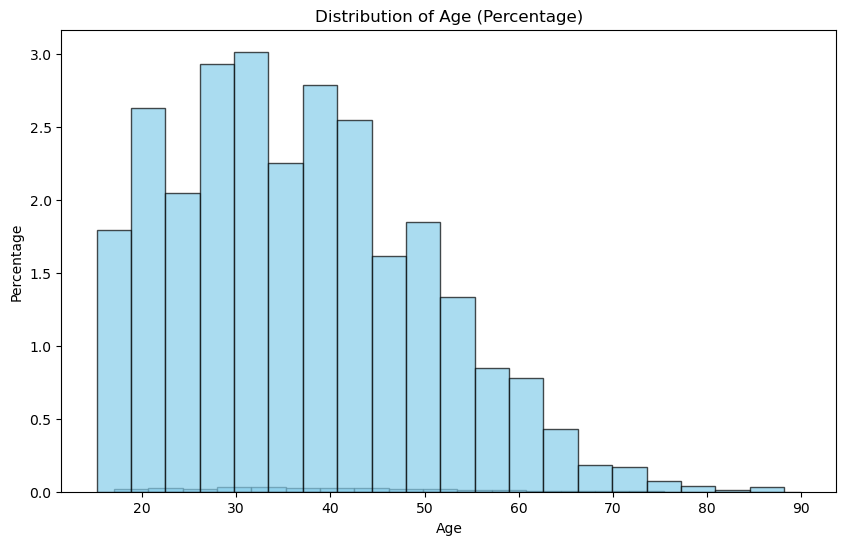

In [14]:
plt.figure(figsize=(10, 6))
# Compute normalized histogram
n, bins, patches = plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7, density=True)

# Convert bin heights to percentages
bin_widths = bins[1] - bins[0]
bin_heights_percentage = [height * 100 for height in n]

# Plot the histogram with percentages
plt.bar(bins[:-1], bin_heights_percentage, width=bin_widths, color='skyblue', edgecolor='black', alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Percentage')
plt.title('Distribution of Age (Percentage)')
plt.show()

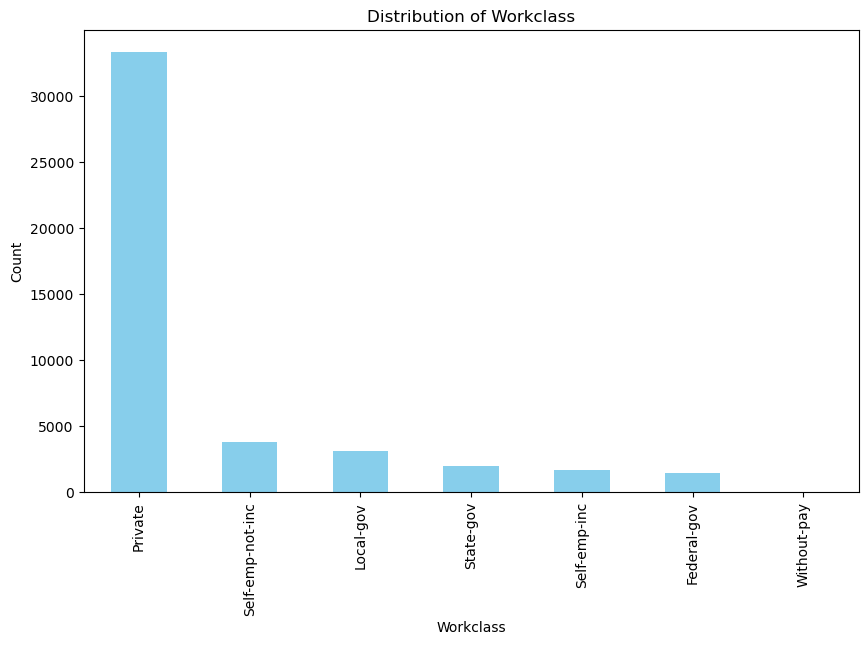

In [8]:
plt.figure(figsize=(10, 6))
df['Workclass'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.title('Distribution of Workclass')
plt.show()

<Figure size 1000x600 with 0 Axes>

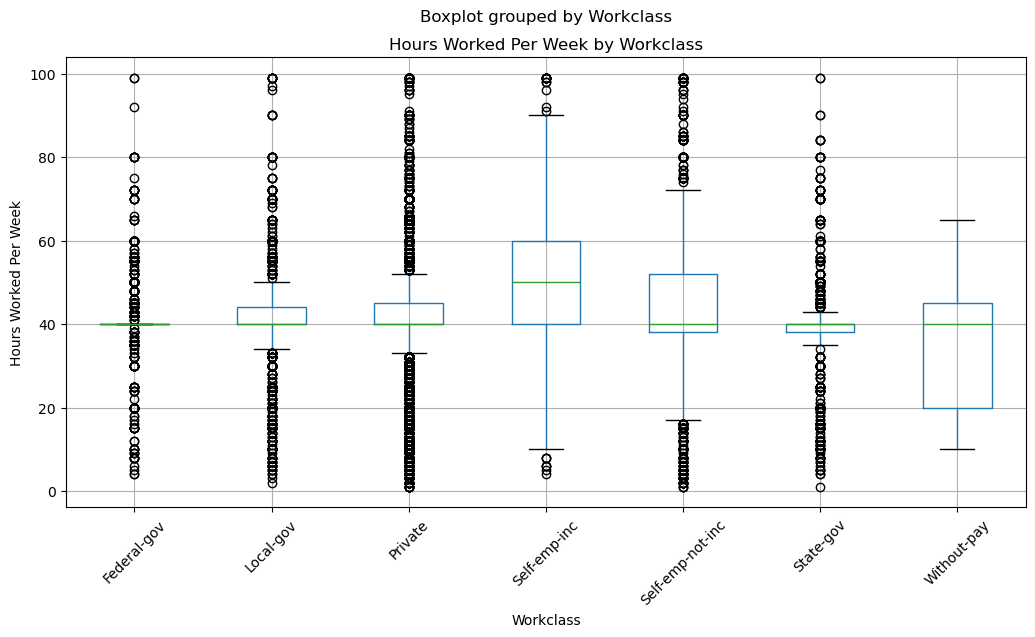

In [9]:
plt.figure(figsize=(10, 6))
df.boxplot(column='Hours-Worked-Per-Week', by='Workclass', figsize=(12, 6))
plt.xlabel('Workclass')
plt.ylabel('Hours Worked Per Week')
plt.title('Hours Worked Per Week by Workclass')
plt.xticks(rotation=45)
plt.show()

In [10]:
import seaborn as sns

plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: 'Private'

<Figure size 1000x800 with 0 Axes>

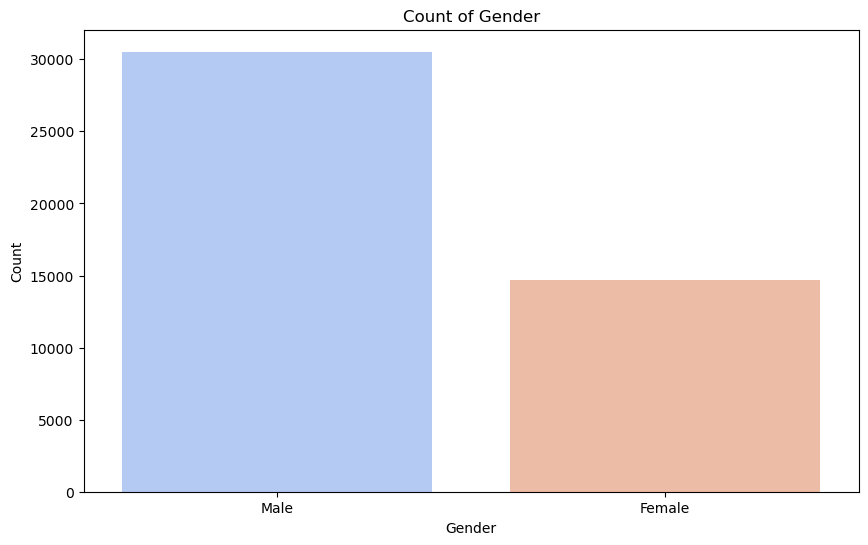

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df, palette='coolwarm')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Gender')
plt.show()